**TEAM DETAILS**


Name: **Nithin Goud Kaira**

UBIT name:nithingo

UBIT person number:50469222





Name: **Kavya Sreeja Naidu Motupalli**

UBIT name:kavyasre

UBIT person number:50465235





Name: **Danussh Garlapati**

UBIT name:danusshg

UBIT person number:50477939

[***EfficientNet***: ](https://arxiv.org/abs/1905.11946)Google created the EfficientNet family of deep neural networks, which achieves cutting-edge accuracy on picture classification tasks while being computationally effective. To attain its great accuracy and efficiency, EfficientNet integrates a number of methods, including depthwise convolution, stochastic depth, and attention mechanism.


***Depthwise Convolutions***: Depthwise separable convolutions are a type of convolutional layer that factorize the standard convolution into two distinct layers: a depthwise convolution and a pointwise convolution. EfficientNet uses these layers. The pointwise convolution applies a 1x1 convolution to aggregate the output channels from the depthwise convolution, whereas the depthwise convolution applies a single filter to each input channel independently. The network becomes more efficient as a result of this factorization because fewer computations are needed.

***Stochastic Depth*** : Stochastic depth: EfficientNet also employs stochastic depth, which, when training, randomly removes entire residual blocks. Through the use of this method, overfitting can be avoided, allowing for the training of deeper, more precise models.


***Attention Mechanism*** :Squeeze-and-excitation, an adaptation of the self-attention method used by EfficientNet, trains users to weigh the relative relevance of various feature map channels. This approach enables the network to concentrate on the most educational channels while ignoring the unimportant ones, improving accuracy and efficiency.

Compound scaling: EfficientNet also presents a novel technique known as compound scaling, which entails scaling the network's depth, width, and resolution all at once. With the help of this method, the network is able to balance efficiency and accuracy across various hardware platforms and image sizes.

We have followed this paper for implementing this following code https://arxiv.org/abs/1905.11946

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, Activation, Dropout,DepthwiseConv2D
import tensorflow_datasets as tfds
from tqdm import tqdm

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

169001437/169001437 [==============================] - 13s 0us/step


In [ ]:
class EfficientNet:

  def __init__(self):
    self.BatchNormalization = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.LeakyReLU()
  
  def normalize(self,x):
    x_norm = tf.keras.layers.BatchNormalization()(x)
    return x_norm
  
  def apply_activation(self,x):
    act_x = tf.keras.layers.LeakyReLU()(x)
    return act_x

  def apply_conv(self,channels,kernel_size,x,strides = False):
    if strides:
      conv_x = tf.keras.layers.Conv2D(channels, kernel_size, strides, padding='same')(x)
      return conv_x
    conv_x = tf.keras.layers.Conv2D(channels, kernel_size, padding='same')(x)
    return conv_x
  
  def apply_depth_convolutions(self,kernel_size,x):
    depth_conv_x = tf.keras.layers.DepthwiseConv2D(kernel_size, padding='same', use_bias=False)(x)
    return depth_conv_x

  def conv_max_pool(self, pool_size, strides,x):
    pool_x = tf.keras.layers.MaxPooling2D(pool_size, strides)(x)
    return pool_x
  
  def perform_block_activation(self,channels_in, channels_out, x):

    x = self.apply_conv(channels_in,(1,1),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.apply_depth_convolutions((1,3),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.conv_max_pool((2,1),(2,1),x)

    x = self.apply_depth_convolutions((3,1),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.apply_conv(channels_out,(2,1),x,(1,2))

    return x

  
  def build_model(self,classes, input_shape):

    x_input = tf.keras.layers.Input(shape=input_shape)
    x = self.perform_block_activation(32, 64, x_input)
    x = self.perform_block_activation(64, 128, x)
    x = self.perform_block_activation(128, 256, x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(classes, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=x_input, outputs=x)
    

    return model


effnet = EfficientNet()


***For CIFAR 100 Dataset***

In [ ]:
model = effnet.build_model(input_shape=(32,32,3),classes=100)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 12s 17ms/step - loss: 3.1439 - accuracy: 0.2509 - val_loss: 4.6642 - val_accuracy: 0.0115
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 2.4236 - accuracy: 0.3857 - val_loss: 2.5436 - val_accuracy: 0.3628
Epoch 3/100
391/391 [==============================] - 6s 16ms/step - loss: 2.1161 - accuracy: 0.4509 - val_loss: 2.5630 - val_accuracy: 0.3678
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 1.9058 - accuracy: 0.4989 - val_loss: 2.5487 - val_accuracy: 0.3835
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 1.7308 - accuracy: 0.5385 - val_loss: 2.6567 - val_accuracy: 0.3770
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 1.5844 - accuracy: 0.5732 - val_loss: 2.7715 - val_accuracy: 0.3778
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 1.4617 - accuracy: 0.5993 - val_loss: 2.8115 - val_accuracy

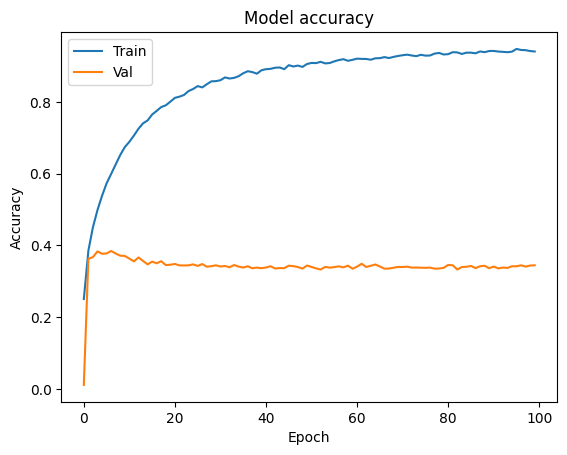

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

***For CIFAR 10 Dataset***

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
class EfficientNet:

  def __init__(self):
    self.BatchNormalization = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.LeakyReLU()
  
  def normalize(self,x):
    x_norm = tf.keras.layers.BatchNormalization()(x)
    return x_norm
  
  def apply_activation(self,x):
    act_x = tf.keras.layers.LeakyReLU()(x)
    return act_x

  def apply_conv(self,channels,kernel_size,x,strides = False):
    if strides:
      conv_x = tf.keras.layers.Conv2D(channels, kernel_size, strides, padding='same')(x)
      return conv_x
    conv_x = tf.keras.layers.Conv2D(channels, kernel_size, padding='same')(x)
    return conv_x
  
  def apply_depth_convolutions(self,kernel_size,x):
    depth_conv_x = tf.keras.layers.DepthwiseConv2D(kernel_size, padding='same', use_bias=False)(x)
    return depth_conv_x

  def conv_max_pool(self, pool_size, strides,x):
    pool_x = tf.keras.layers.MaxPooling2D(pool_size, strides)(x)
    return pool_x
  
  def perform_block_activation(self,channels_in, channels_out, x):

    x = self.apply_conv(channels_in,(1,1),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.apply_depth_convolutions((1,3),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.conv_max_pool((2,1),(2,1),x)

    x = self.apply_depth_convolutions((3,1),x)
    x = self.normalize(x)
    x = self.apply_activation(x)

    x = self.apply_conv(channels_out,(2,1),x,(1,2))

    return x

  
  def build_model(self,classes, input_shape):

    x_input = tf.keras.layers.Input(shape=input_shape)
    x = self.perform_block_activation(32, 64, x_input)
    x = self.perform_block_activation(64, 128, x)
    x = self.perform_block_activation(128, 256, x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(classes, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=x_input, outputs=x)
    

    return model


effnet = EfficientNet()


In [ ]:
model = effnet.build_model(input_shape=(32,32,3),classes=10)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit(x_train, y_train, epochs=120, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/120
782/782 [==============================] - 15s 12ms/step - loss: 1.2781 - accuracy: 0.5490 - val_loss: 1.0938 - val_accuracy: 0.6093
Epoch 2/120
782/782 [==============================] - 7s 10ms/step - loss: 0.9886 - accuracy: 0.6523 - val_loss: 1.0012 - val_accuracy: 0.6572
Epoch 3/120
782/782 [==============================] - 9s 12ms/step - loss: 0.8937 - accuracy: 0.6871 - val_loss: 0.9934 - val_accuracy: 0.6576
Epoch 4/120
782/782 [==============================] - 8s 10ms/step - loss: 0.8286 - accuracy: 0.7085 - val_loss: 1.0201 - val_accuracy: 0.6531
Epoch 5/120
782/782 [==============================] - 8s 11ms/step - loss: 0.7874 - accuracy: 0.7240 - val_loss: 0.9133 - val_accuracy: 0.6862
Epoch 6/120
782/782 [==============================] - 8s 10ms/step - loss: 0.7472 - accuracy: 0.7391 - val_loss: 1.0066 - val_accuracy: 0.6718
Epoch 7/120
782/782 [==============================] - 9s 11ms/step - loss: 0.7130 - accuracy: 0.7513 - val_loss: 0.9475 - val_accuracy

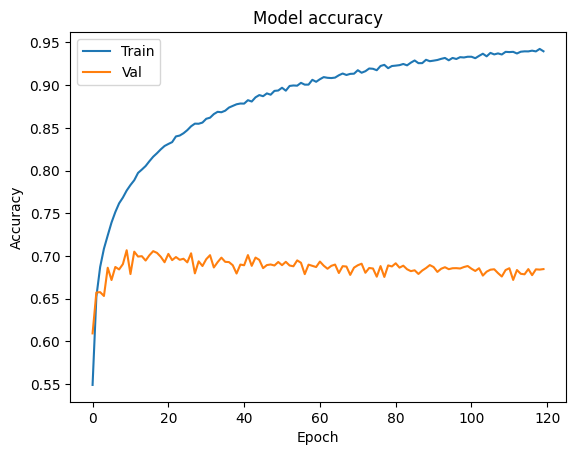

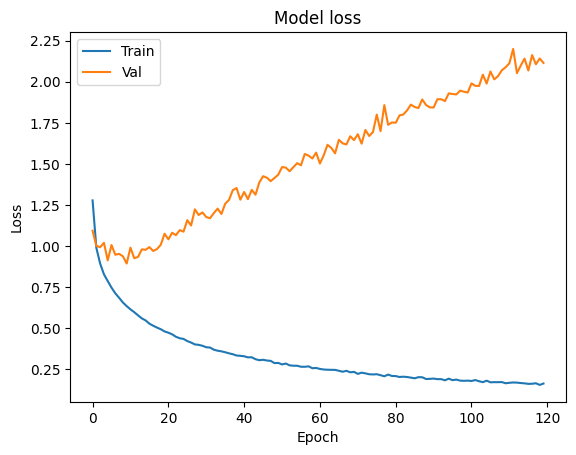

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        96        
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 depthwise_conv2d_6 (Depthwi  (None, 32, 32, 32)       96        
 seConv2D)                                                       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128 